In [66]:
import pandas as pd 
import matplotlib.pyplot as plt

datos = pd.read_csv('boletos.csv')
df = pd.DataFrame(datos)
df.head(5)

,years,boleto
0,66,8.17
1,65,8.13
2,64,7.96
3,63,7.93
4,62,7.89


In [67]:
X  = df['years']
Y = df['boleto']

X1  = df['years']
Y1 = df['boleto']

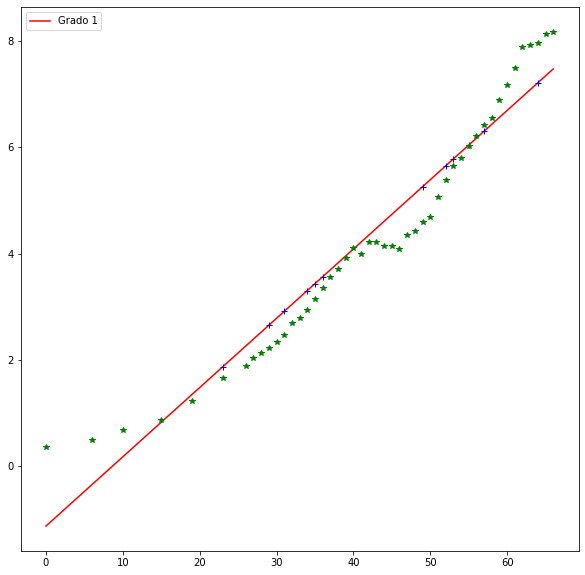

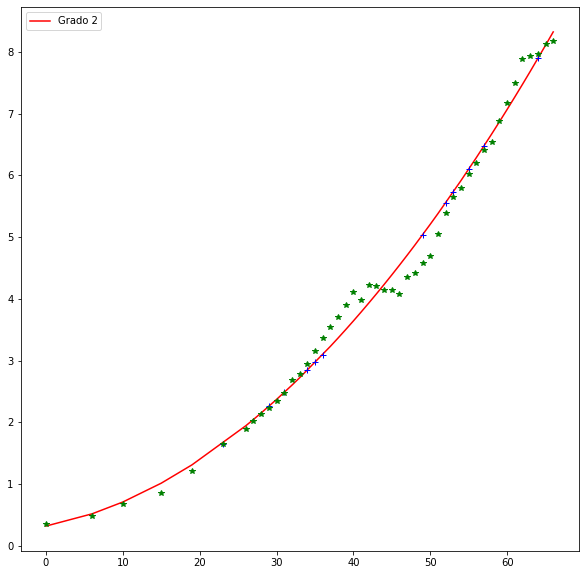

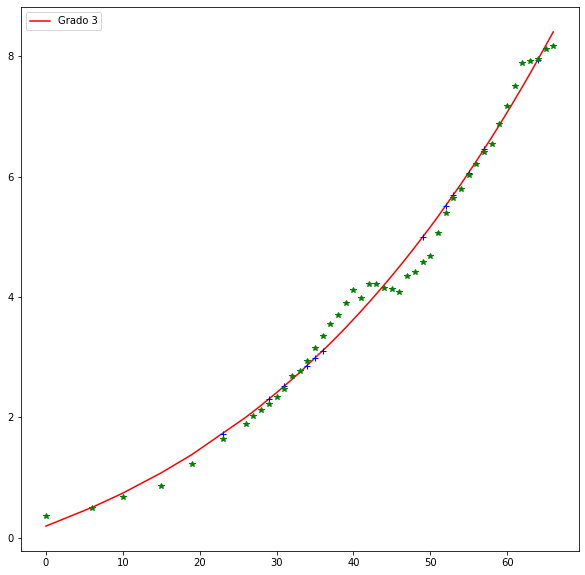

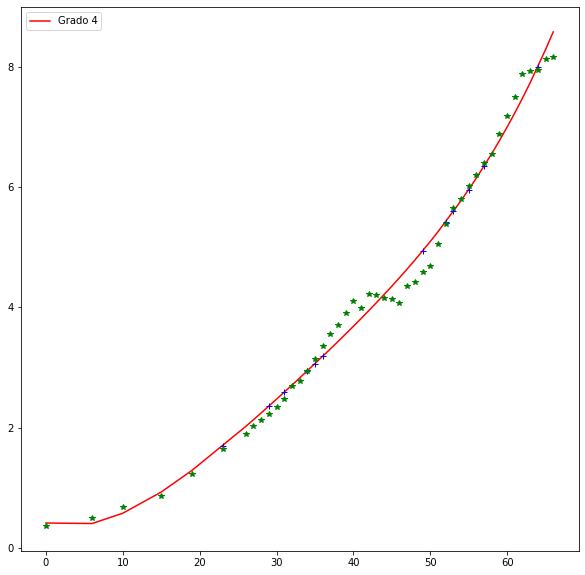

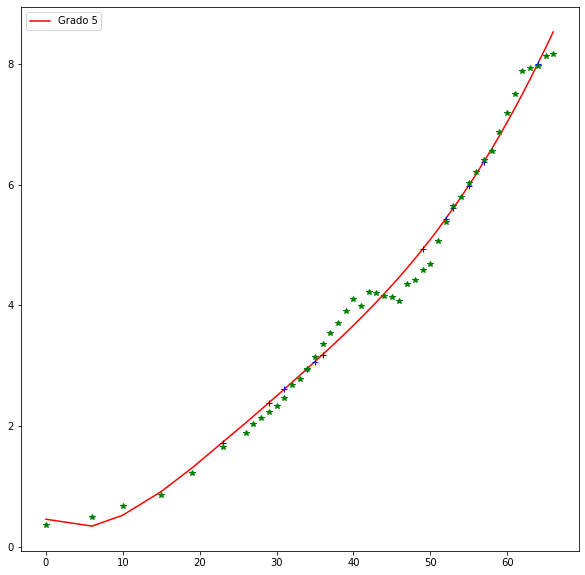

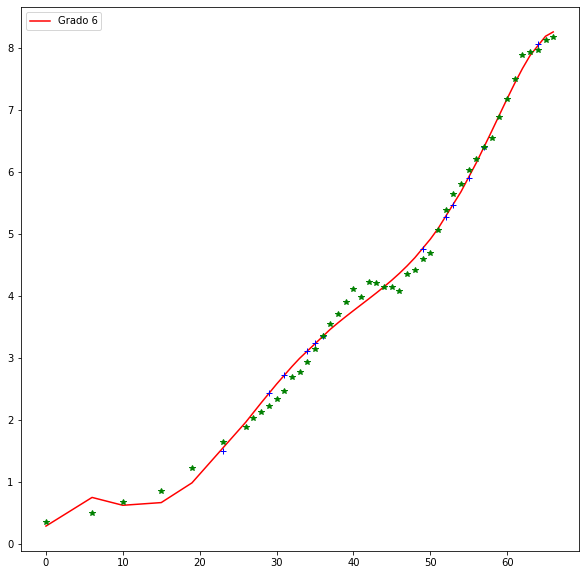

In [68]:
## PRIMERO SELECCIONAMOS LOS DATOS PARA EL MODELO
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
X_train = X_train.values.reshape([X_train.values.shape[0],1])
X_test = X_test.values.reshape([X_test.values.shape[0],1])

##EN ESTE PUNTO HACEMOS LA MODIFICACION POLINOMIAL POR MEDIO DE UN FOR
## PARA OBSERVAR QUE GRADO SE ADECUA MEJOR A LOS DATOS

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

title = ['Grado 0','Grado 1','Grado 2','Grado 3','Grado 4','Grado 5','Grado 6']

for i in range(1,7):
    Poli = PolynomialFeatures(degree=i)
    X_train_pol = Poli.fit_transform(X_train)
    X_test_pol = Poli.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_pol, Y_train)
    y_predic = model.predict(X_train_pol)
    Y_predic = model.predict(X_test_pol)
    xt, yt = zip(*sorted(zip(X_test,Y_predic)))
    X,y = zip(*sorted(zip(X_train,y_predic)))
    ## GRAFICA
    fig = plt.figure(figsize=(10,10))
    plt.plot(X,y,'-',color='red', label=title[i])
    plt.plot(xt,yt,'+',color='blue')
    plt.plot(X1,Y1,'*',color='green')
    plt.legend(loc=2)
    
    ##LA LINEA ROJA NOS MUESTRA NOS MUETRA LOS DATOS DE ENTRENAMIENTO
    ##LOS PUNTOS AZULES lOS VALORES PREDICHOS O VALORES DE PRUEBA
    ##LOS PUNTOS VERDES LOS DATOS UTILIZADOS, DATOS BASE